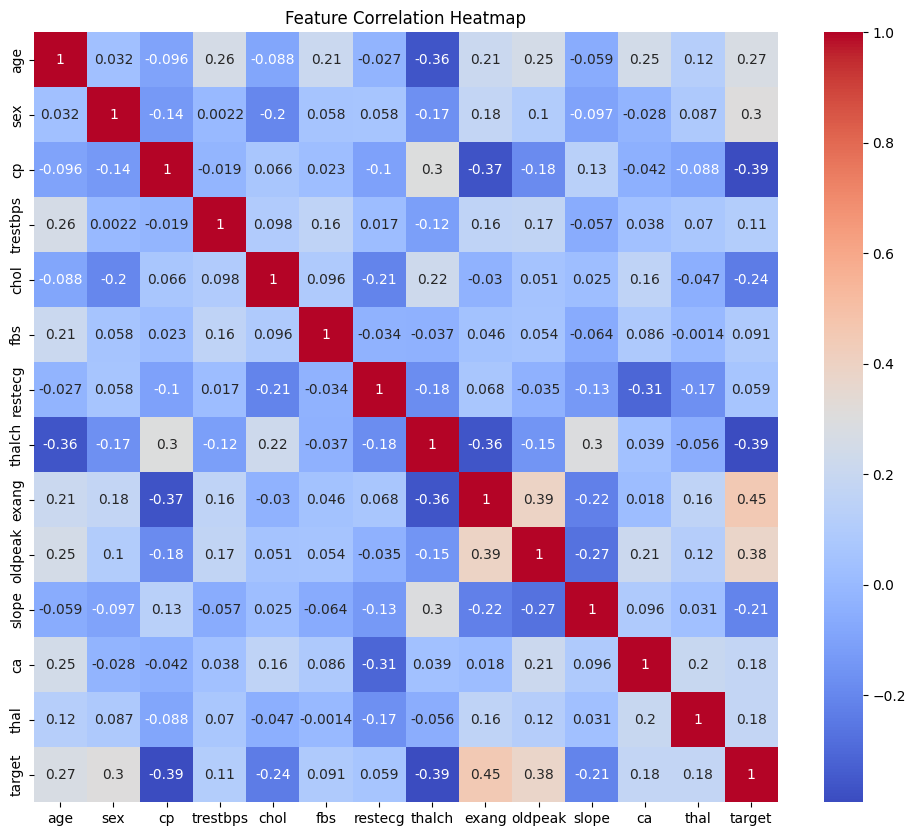

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82        77
           1       0.84      0.85      0.84        89

    accuracy                           0.83       166
   macro avg       0.83      0.83      0.83       166
weighted avg       0.83      0.83      0.83       166



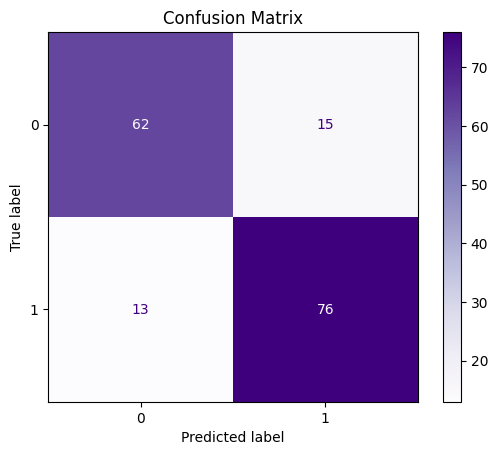

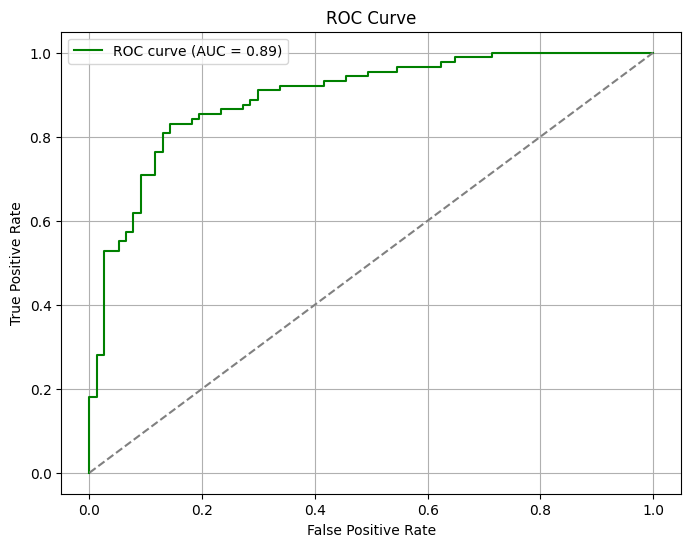

Example Input:
     age  sex  cp  trestbps   chol   fbs  restecg  thalch  exang  oldpeak  \
196   69    1   3     160.0  234.0  True        0   131.0      0      0.1   

     slope   ca  thal  
196      1  1.0     1  

Predicted Class: 0 (0 = No Disease, 1 = Disease)
Predicted Probability of Heart Disease: 44.32%


In [9]:
# === Step 0: Suppress warnings ===
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# === Step 1: Import Libraries ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, auc
import joblib

# === Step 2: Load Data ===
df = pd.read_csv("/content/heart_disease_uci.csv")  # replace with your path if needed

# === Step 3: Preprocess Data ===
df.drop(columns=['id', 'dataset'], inplace=True)
df.dropna(subset=['trestbps', 'chol', 'thalch', 'oldpeak'], inplace=True)

for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df['target'] = (df['num'] > 0).astype(int)
df.drop(columns='num', inplace=True)

# === Step 4: Visualize Correlation Matrix ===
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# === Step 5: Split Data ===
X = df.drop(columns='target')
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Step 6: Train Model ===
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# === Step 7: Evaluate Model ===
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Purples')
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# === Step 8: Save Model ===
joblib.dump(model, "heart_disease_model.pkl")

# === Step 9: Predict on New Data (Example) ===
sample_input = X_test.iloc[0:1]
predicted_class = model.predict(sample_input)[0]
predicted_proba = model.predict_proba(sample_input)[0][1]

print("Example Input:")
print(sample_input)
print(f"\nPredicted Class: {predicted_class} (0 = No Disease, 1 = Disease)")
print(f"Predicted Probability of Heart Disease: {predicted_proba:.2%}")
